### 2024-05-09 Logistic


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [25]:
treatment = pd.read_csv("treatment.csv.bz2", sep = "\t")
treatment.head()

,treat,age,educ,ethn,married,re74,re75,re78,u74,u75
0,True,37,11,black,True,0.0,0.0,9930.05,True,True
1,True,30,12,black,False,0.0,0.0,24909.50,True,True
2,True,27,11,black,False,0.0,0.0,7506.15,True,True
3,True,33,8,black,False,0.0,0.0,289.79,True,True
4,True,22,9,black,False,0.0,0.0,4056.49,True,True


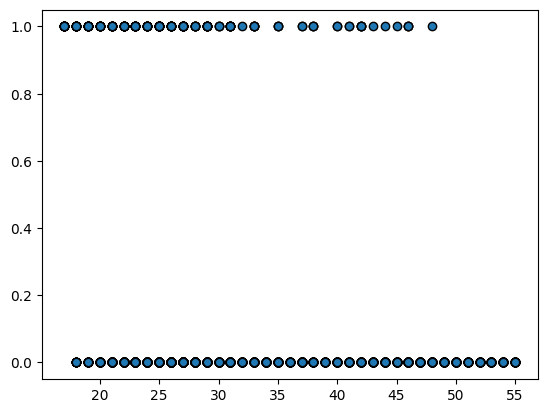

In [26]:
x = treatment.age
y = treatment.treat
_ = plt.scatter(x, y, edgecolor = "k")

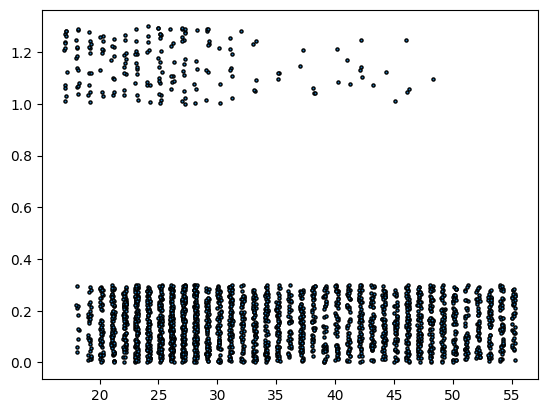

In [27]:
N = treatment.shape[0]
_ = plt.scatter(x + np.random.uniform(0, 0.3, size = N),
            	y + np.random.uniform(0, 0.3, size = N),
            	edgecolor = "k", s= 5)

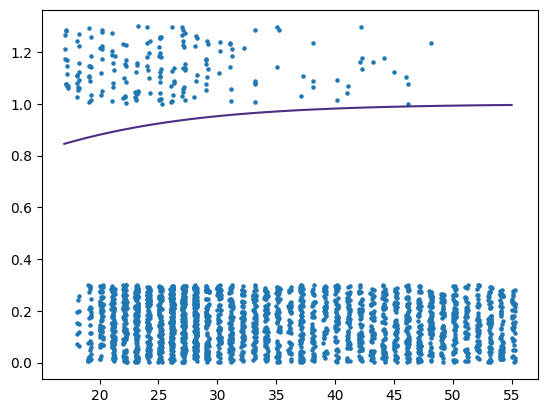

In [28]:
_ = plt.scatter(x + np.random.uniform(0, 0.3, size = N),
                y + np.random.uniform(0, 0.3, size = N),
                s= 5)
age = np.linspace(17, 55, 100)
b0 = 0
b1 = 0.1
pr = 1/(1 + np.exp(-(b0 + b1*age)))
_ = plt.plot(age, pr, c = "#4b2e83")

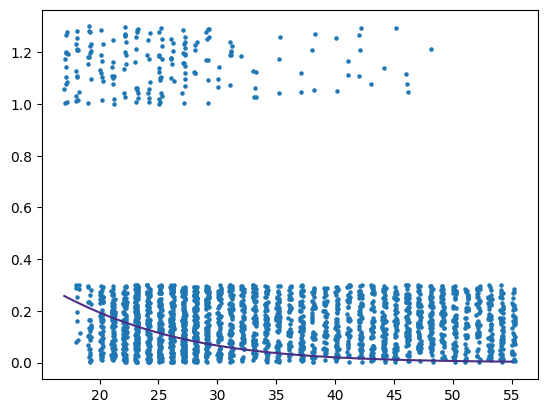

In [29]:
_ = plt.scatter(x + np.random.uniform(0, 0.3, size = N),
                y + np.random.uniform(0, 0.3, size = N),
                s= 5)
age = np.linspace(17, 55, 100)
b0 = 1.03
b1 = -0.1229
pr = 1/(1 + np.exp(-(b0 + b1*age)))
_ = plt.plot(age, pr, c = "#4b2e83")

In [30]:
m = smf.logit("treat ~ age", data= treatment).fit()
m.summary()

ValueError: endog has evaluated to an array with multiple columns that has shape (2675, 2). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

In [ ]:
treatment["T"] = treatment.treat + 0
m = smf.logit("T ~ age", data= treatment).fit()
m.summary()

Optimization terminated successfully.
         Current function value: 0.221883
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      T   No. Observations:                 2675
Model:                          Logit   Df Residuals:                     2673
Method:                           MLE   Df Model:                            1
Date:                Thu, 09 May 2024   Pseudo R-squ.:                  0.1176
Time:                        14:42:20   Log-Likelihood:                -593.54
converged:                       True   LL-Null:                       -672.65
Covariance Type:            nonrobust   LLR p-value:                 2.760e-36
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0343      0.330      3.135      0.002       0.388       1.681
age           -0.1229      0.012    -10.052      0.000      -0.147      -0.099
==============================================================================
"""

In [ ]:
b0 = 1.03
b1 = -0.1229
eta = b0 + b1*20
1/(1 + np.exp(-eta))

0.19341049868657156

In [ ]:
m.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                      T
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0075      0.001     -9.181      0.000      -0.009      -0.006
==============================================================================
"""

In [ ]:
m.params

Intercept    1.034257
age         -0.122942
dtype: float64

Of two people of the same age, the one who has 1 year more of education has 2 pct pt lower probability to participate, in average.

In [ ]:
m.params.iloc[0]

1.0342574038329906

In [ ]:
m.get_margeff().margeff

array([-0.00745615])

In [33]:
treatment["T"] = treatment.treat + 0
m = smf.logit("T ~ age + educ", data= treatment).fit()
m.summary()

Optimization terminated successfully.
         Current function value: 0.199041
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      T   No. Observations:                 2675
Model:                          Logit   Df Residuals:                     2672
Method:                           MLE   Df Model:                            2
Date:                Sat, 11 May 2024   Pseudo R-squ.:                  0.2085
Time:                        12:17:14   Log-Likelihood:                -532.44
converged:                       True   LL-Null:                       -672.65
Covariance Type:            nonrobust   LLR p-value:                 1.276e-61
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6955      0.573      9.939      0.000       4.572       6.819
age           -0.1450      0.012    -12.199      0.000      -0.168      -0.122
educ          -0.3577      0.034    -10.510      0.000      -0.424      -0.291
==============================================================================
"""

In [35]:
treatment['T']

0       1
1       1
2       1
3       1
4       1
       ..
2670    0
2671    0
2672    0
2673    0
2674    0
Name: T, Length: 2675, dtype: int64

In [34]:
m.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                      T
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0081      0.001    -11.681      0.000      -0.009      -0.007
educ          -0.0199      0.002    -10.341      0.000      -0.024      -0.016
==============================================================================
"""